## 19. Модель Гаусса-Маркова простой линейной регрессии. Оценка параметров и анализ остатков.

### Пример.

Себестоимость экземпляра книги в зависимости от тиража.

In [1]:
x<-c(    1,    2,    3,    5,   10,   20,  50,  100,  200)
y<-c(10.15, 5.52, 4.08, 2.11, 1.62, 1.42, 1.3, 1.21, 1.15)

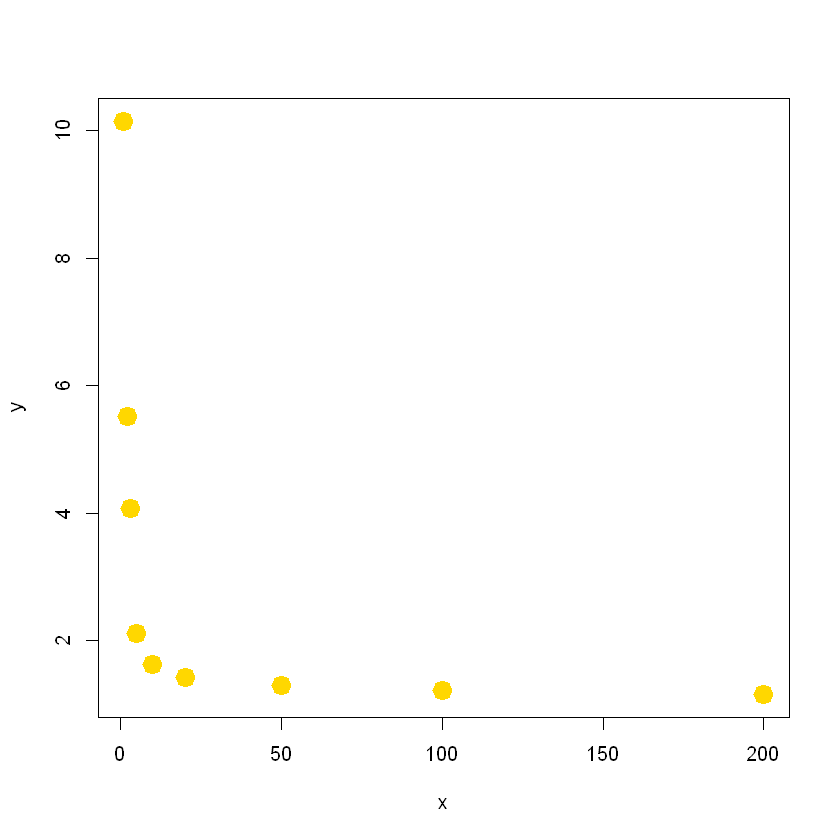

In [12]:
plot(x,y,col = 'gold', lwd = 10)

Из графика видно, что зависимость не линейная: $y=a+\frac{b}{x}$, но если сделать замену $z=\frac{1}{x}$, то модель станет линейной.

Для этого используют специальные оператор `I`

`lm` - linear model

In [13]:
lm(y~I(1/x))->y.lm1
y.lm1


Call:
lm(formula = y ~ I(1/x))

Coefficients:
(Intercept)       I(1/x)  
      0.920        9.142  


$y = a + bx$
* `a` - intercept 
* `b` - slope

Для того, чтобы узнать все, что выдает функция для регрессии, нужно использовать `summary`. Функкия выдает следующие значения:
* строка, которая показывает по какой формуле строилась модель
* информация о распределении остатков
* строка с коэффициентами (оценка, стандартная ошибка, значене t-статистики и p-value)

Также R обозначает звездочками `значимые` коэффициенты, т.е. те, для которых p-value достаточно мало (значит эти коэффициенты с малой вероятностью равны нулю).

In [14]:
summary(y.lm1)


Call:
lm(formula = y ~ I(1/x))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63840  0.02901  0.08804  0.18428  0.19857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.9200     0.1234   7.453 0.000143 ***
I(1/x)        9.1419     0.3114  29.356 1.37e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.29 on 7 degrees of freedom
Multiple R-squared:  0.9919,	Adjusted R-squared:  0.9908 
F-statistic: 861.8 on 1 and 7 DF,  p-value: 1.371e-08


С помощью функции `anova` можно получить таблицу дисперсионного анализа

In [15]:
anova(y.lm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
I(1/x),1,72.4895757,72.48957573,861.7631,1.370837e-08
Residuals,7,0.5888243,0.08411775,NA,NA


Необходимо проверить `ошибки` на нормальность, потому что в предположении регрессии шум в данных имеет нормальное распределение


	Shapiro-Wilk normality test

data:  resid(y.lm1)
W = 0.74763, p-value = 0.00509


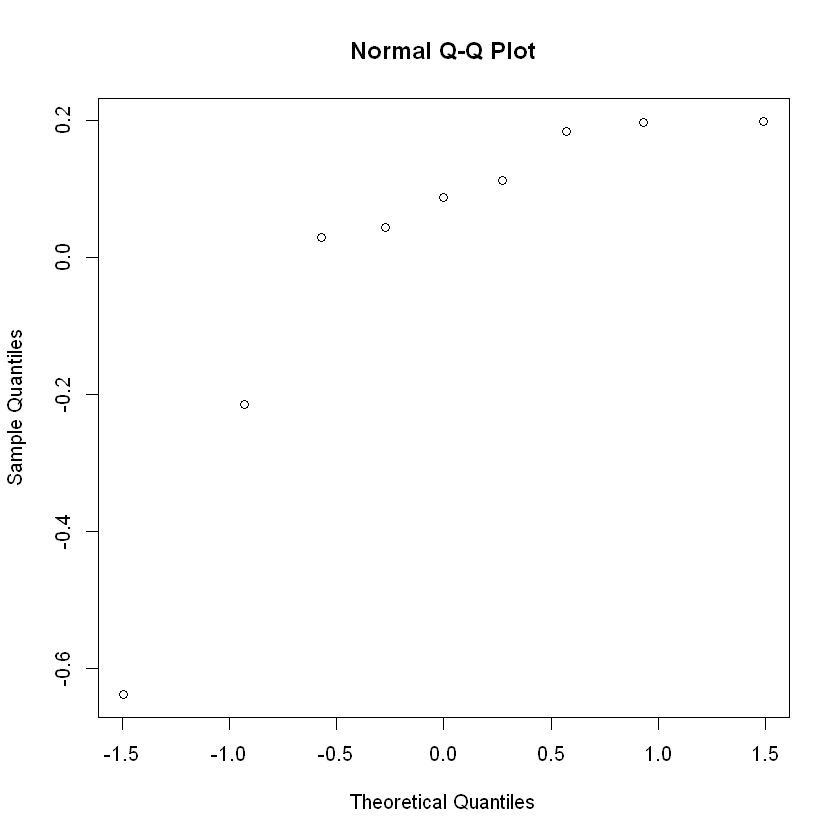

In [19]:
shapiro.test(resid(y.lm1))
qqnorm(resid(y.lm1))

Исходя из значения p-value и графика квантилей, приходим к выводу, что нормальности нет.

Нарисуем линию регрессии по подобранным параметрам

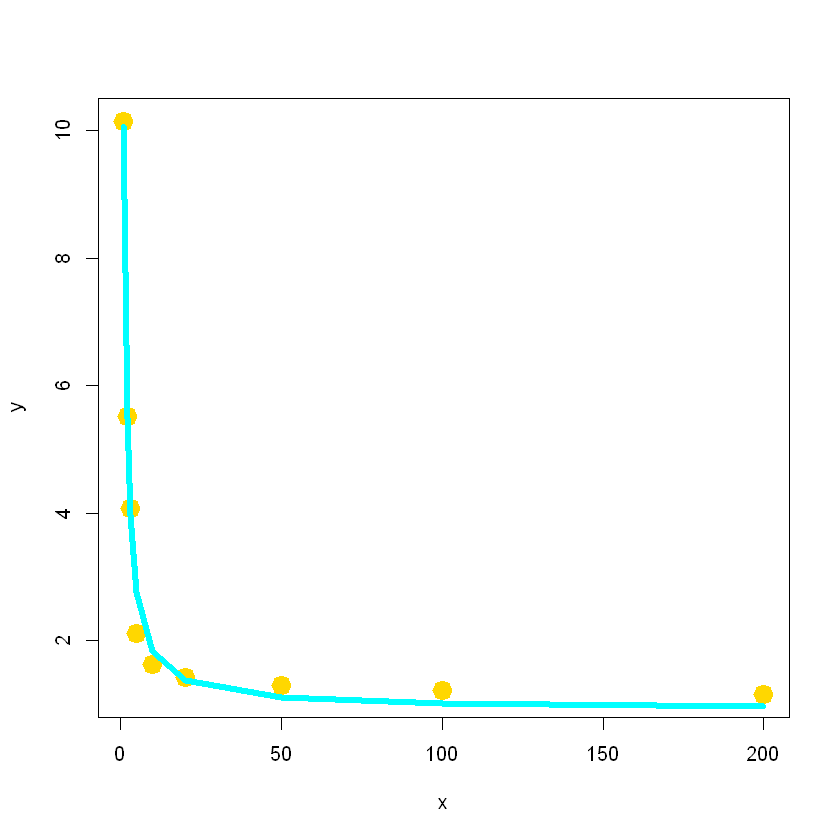

In [22]:
plot(x,y,col = 'gold', lwd = 10)
lines(x, fitted(y.lm1), col = 'cyan', lwd = 5) # x_i, y_i

Также с помощью подобранных параметров можно найти значения себестоимости вне точек сетки тиража

In [23]:
predict(y.lm1, list(x=c(1.5, 4, 30)))

1        2        3 
7.014643 3.205499 1.224745